In [5]:
import matplotlib.pyplot as plt
import numpy as np
import os
from collections import defaultdict


In [92]:
def try_numeric(item):
    item = item.replace("%","").strip()
    item = item.replace("percent","").strip()
    item = item.replace("trainset","").strip()
    item = item.replace("tonne","").strip()
    item = item.replace("kg","").strip()
    item = item.replace("gramme","").strip()
    item = item.replace("kilogramme","").strip()
    item = item.replace("metre","").strip()
    item = item.replace("kilometre","").strip()

    try:
        tmp = int(item)
        return True
    except:

        try:
            tmp = float(item)
            return True
        except:
            return False

def maybe_split(keys):
    split = keys.split("[SEP]")
    if len(split) == 2:
        return split[0].strip(),split[1].strip(), None
    elif len(split) == 3:
        return [s.strip() for s in split[:3]]

def convert_comparable(item):
    if try_numeric(item):
        item = item.replace("%", "").strip()
        item = item.replace("percent", "").strip()
        item = item.replace("trainset", "").strip()
        item = item.replace("tonne", "").strip()
        item = item.replace("kg", "").strip()
        item = item.replace("gramme", "").strip()
        item = item.replace("kilogramme", "").strip()
        item = item.replace("metre", "").strip()
        item = item.replace("kilometre", "").strip()

        return float(item.replace("numeric",""))
    else:
        return item

def generate_answers(question_text, question_type, question_facts):
    assert all(q["qid"].startswith(question_type) for q in question_facts)
    answer_keys = dict()
    if question_type== "argmin":
        # get all keys and find the key with the smallest count
        answers = defaultdict(list)
        numeric_answers = False
        for question in question_facts:
            if question["symmetric"]:
                ak = None
                k, v = question["generated"]["derivation"].split("[SYM]" if "[SYM]" in question["generated"]["derivation"] else "[SEP]")
            else:
                k, v, ak = maybe_split(question["generated"]["derivation"])
            assert "[SEP]" not in k
            assert "[SEP]" not in v

            if try_numeric(v):
                numeric_answers = True

            try:
                if isinstance(convert_comparable(v.strip()),str) and numeric_answers:
                    continue
                answers[k.strip()].append((convert_comparable(v.strip()), question))
                answer_keys[k.strip()] = ak
                    
                
                if question["symmetric"]:
                    answers[v.strip()].append((convert_comparable(k.strip()), question))
            except:
                pass

        if not len(answers):
            return [None]
        else:
            if not numeric_answers:
                best = sorted(answers.items(), key=lambda a: len(a[1]), reverse=False)
                lowest = len(best[0][1])
                best_answers = {k: v for k, v in best if len(v) == lowest}
            else:
                best = sorted(filter(lambda a: not isinstance(a[1][0][0],str), answers.items()), key=lambda a: a[1][0][0], reverse=False)
                lowest = best[0][1][0]
                best_answers = {k: v for k, v in best if v[0] == lowest}
            return list([answer_keys[k] if k in answer_keys and answer_keys[k] is not None else k for k in best_answers.keys()])


    elif question_type== "argmax":
        # get all keys and find the key with the smallest count
        answers = defaultdict(list)

        numeric_answers = False
        for question in question_facts:
            if question["symmetric"]:
                ak = None
                k, v = question["generated"]["derivation"].split("[SYM]" if "[SYM]" in question["generated"]["derivation"] else "[SEP]")
            
            else:
                k, v, ak = maybe_split(question["generated"]["derivation"])
            assert "[SEP]" not in k
            assert "[SEP]" not in v

            if try_numeric(v):
                numeric_answers = True

            try:
                if question["symmetric"]:
                    answers[v.strip()].append((convert_comparable(k.strip()), question))
                answers[k.strip()].append((convert_comparable(v.strip()), question))
                answer_keys[k.strip()] = ak

                if question["symmetric"]:
                    answers[v.strip()].append((convert_comparable(k.strip()), question))
            except:
                pass

        if not len(answers):
            return [None]
        else:
            if not numeric_answers:
                best = sorted(answers.items(), key=lambda a: len(a[1]), reverse=True)
                highest = len(best[0][1])
                best_answers = {k: v for k, v in best if len(v) == highest}
            else:
                
                best = sorted(filter(lambda a: not isinstance(a[1][0][0],str), answers.items()), key=lambda a: a[1][0][0], reverse=True)
                highest = best[0][1][0]
                best_answers = {k: v for k, v in best if v[0] == highest}
            return list([answer_keys[k] if k in answer_keys and answer_keys[k] is not None else k for k in best_answers.keys()])


    elif question_type== "min":
        # get all keys and find the key with the smallest count
        answers = []

        for question in question_facts:
            v = question["generated"]["derivation"]
            if "[SEP]" in v:
                v = v.split("[SEP]",maxsplit=1)[1].strip()

            assert "[SEP]" not in v, v
            if try_numeric(v):
                answers.append(convert_comparable(v))

        best = np.min(answers) if len(answers) else None
        return [best]


    elif question_type== "max":
        # get all keys and find the key with the smallest count
        answers = []

        for question in question_facts:
            v = question["generated"]["derivation"]
            if "[SEP]" in v:
                v = v.split("[SEP]",maxsplit=1)[1].strip()

            assert "[SEP]" not in v, v
            if try_numeric(v):
                answers.append(convert_comparable(v))

        best = np.max(answers) if len(answers) else None
        return [best]

    elif question_type== "count":
        # get all keys and find the key with the smallest count
        answers = set()

        for question in question_facts:
            v = question["generated"]["derivation"]
            assert "[SEP]" not in v, v
            answers.add(convert_comparable(v))



        best = len(answers)
        return [best]

    elif question_type== "bool":
        # get all keys and find the key with the smallest count
        answers = set()

        for question in question_facts:
            v = question["generated"]["derivation"]
            assert "[SEP]" not in v, v
            assert v == "TRUE" or v == "FALSE"
            answers.add(convert_comparable(v))

        return list(answers) if len(answers) else [None]

    elif question_type== "set":
        answers = set()

        for question in question_facts:
            v = question["generated"]["derivation"]
            assert "[SEP]" not in v, v
            answers.add(convert_comparable(v))

        return list(answers)

    raise Exception("Unknown quesiton type")


SyntaxError: invalid syntax (<ipython-input-92-c3b911d321df>, line 29)

In [89]:
import json
import numpy as np

def precision(actual, predicted):
    actual_set = set(actual)
    return (
        sum(1.0 for p in predicted if p in actual_set) / float(len(predicted))
        if len(predicted)
        else 1.0
    )


def recall(actual, predicted):
    if len(actual) == 0:
        return 1.0

    actual_set = set(actual)
    return (
        sum(1.0 for p in predicted if p in actual_set) / float(len(actual))
        if len(actual)
        else 1.0
    )


def f1(actual, predicted):
    pr = precision(actual, predicted)
    rec = recall(actual, predicted)

    return 2.0 * pr * rec / (pr + rec) if (pr + rec > 0.0) else 0.0


def parse(answer):
    return answer


def single_score(actual, predicted, query_type):

        
    
    if query_type in {"min", "max"}:
        if actual is None and predicted is None:
            return 1.0

        if actual is not None and predicted is None:
            return 0.0

        if predicted is not None and actual is None:
            return 0.0
    
        return 1.0 if predicted[0] == actual[0] else 0.0

    elif query_type in {"argmin", "argmax", "set", "set_complex_ok", "set_complex_none", "argmin_complex_ok","argmin_complex_none","argmax_complex_ok","argmax_complex_none"}:
        
#         if "complex" not in query_type:
#             print(actual,predicted, f1(set(actual if actual is not None else []),set(predicted if predicted is not None else [])))
        return f1(set(actual if actual is not None else []),set(predicted if predicted is not None else []))

    elif query_type in {"count","count_complex_ok","count_complex_none"}:
        if predicted is None or len(predicted) > 1:
            return 0.0

        return 1.0 if predicted[0] == actual[0] else 0.0
    elif query_type in {"bool", "bool_complex_ok", "bool_complex_none"}:
        if predicted is None and actual is None:
            return 1.0
        else:
            if isinstance(actual, list) and isinstance(predicted, list):
                if len(actual) == 1 and len(predicted) == 1:
                    return 1.0 if predicted[0] == actual[0] else 0.0

            return 0.0

    return 0.0


Total 0.9173055486615397
Num instances 7638
Total 0.9137222619894398
Num instances 7638
Total 0.9163477058439167
Num instances 7638


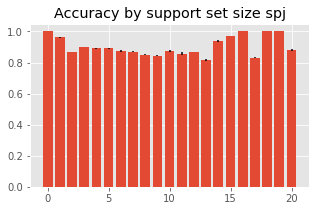

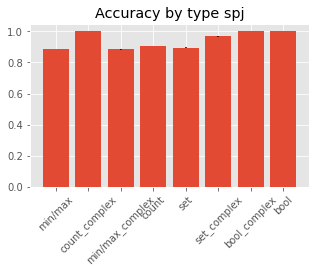

Total 0.8873471289038498
Num instances 7246
Total 0.8913209429740048
Num instances 7210


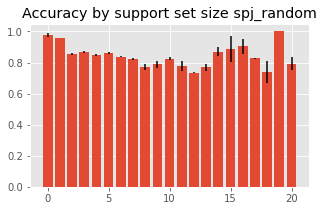

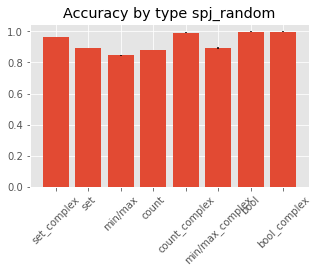

Total 0.9117995110884765
Num instances 7638


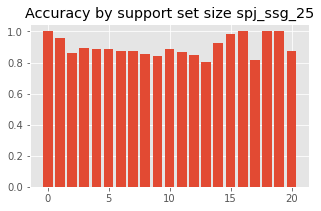

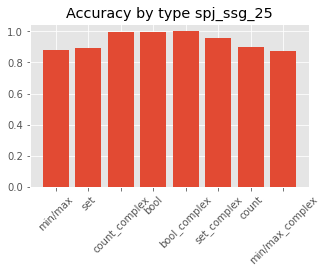

0


In [101]:
breakdown = []
raw = []

seeds = [1,2,3]

all_system_size = dict()
all_system_type = dict()
all_system_bins = dict()


ranges = [0,1,2,5,10,20]
bins = dict()
for idx,r in enumerate(ranges[:-1]):
    for item in list(range(ranges[idx],ranges[idx+1])):
        bins[item] = (ranges[idx],ranges[idx+1])
bins[20] = (20)
skipped = 0

systems = ["spj","spj_random","spj_ssg_25"]
for system in systems:
    master_breakdown_size = defaultdict(list)
    master_breakdown_type = defaultdict(list)
    master_breakdown_bins = defaultdict(list)

    for seed in seeds:
        breakdown = []
        raw = []

        if not os.path.exists(f"checkpoint/experiment={system}/db=v1.8_25,lr=1e-4/seed-{seed}/metrics_test.json"):
            continue
        with open(f"checkpoint/experiment={system}/db=v1.8_25,lr=1e-4/seed-{seed}/metrics_test.json") as f:
            for line in f:
                instance = json.loads(line)["test"]
                raw.extend(instance["raw"])

#         if not os.path.exists(f"checkpoint/experiment={system}/db=v1.8_25,lr=1e-4/seed-{seed}/metrics_test.json"):
#             continue
#         with open(f"checkpoint/experiment={system}/db=v1.8_25,lr=1e-4/seed-{seed}/metrics_test.json") as f:
#             for line in f:
#                 instance = json.loads(line)["test"]
#                 raw.extend(instance["raw"])
                
        by_db = defaultdict(list)
        for i in raw:
            by_db[(i[3]['db_id'], i[3]["query_id"])].append(i)



        restored = []
        for k,v in by_db.items():

            target_derivations = [{"qid":v[0][3]['type'],"symmetric":"P47" in v[0][3]['relation'],"generated":{"derivation":a[1].split(maxsplit=1)[1]}} for a in v if a[1].strip() != "[NULL_ANSWER]"]
            
            try:

                predicted_derivations = [{"qid": v[0][3]['type'], "symmetric": "P47" in v[0][3]['relation'],
                                          "generated": {"derivation": a[0].split(maxsplit=1)[1]}} for a in v if a[0] != "[NULL_ANSWER]" ]

                
                pred = generate_answers("", v[0][3]['type'].replace("_complex","").replace("_ok","").replace("_none",""), predicted_derivations)
            except AssertionError as e:
           
                skipped+=1
                pred = [None]
            except IndexError as e:
                pred = [None]
            except TypeError as e:
                pred = [None]
            except ValueError as e:
                pred = [None]
            target = generate_answers("", v[0][3]['type'].replace("_complex","").replace("_ok","").replace("_none",""), target_derivations)


            restored.append((pred,target,None,v[0][3]))


        breakdown = defaultdict(list)
        breakdown_size = defaultdict(list)
        breakdown_bins = defaultdict(list)

        ss = defaultdict(list)
        total_scores = list()

        for i in range(0,21):
            breakdown_size[i]=[]

        for predicted,actual,_,metadata in restored:

            predicted = parse(predicted)
            actual = parse(actual)

            try:
                local_score = single_score(actual, predicted, metadata["type"])
            except IndexError as e:
                raise e
                
    
            breakdown[metadata["type"].replace("arg","").replace("min","mmx").replace("max","mmx").replace("mmx","min/max").replace("_ok","").replace("_none","")].append(local_score)
            
#             ss[metadata["type"]].append(len(metadata["facts]))
            breakdown_size[0 if len(actual) and None in actual else (len(metadata["facts"]) if len(metadata["facts"]) < 20 else 20)].append(local_score)
            breakdown_bins[bins[0 if len(actual) and None in actual else (len(metadata["facts"]) if len(metadata["facts"]) < 20 else 20)]].append(local_score)            
            
            total_scores.append(local_score)

        for k,v in breakdown_size.items():
            master_breakdown_size[k].append(np.mean(v))

        for k,v in breakdown.items():
            master_breakdown_type[k].append(np.mean(v))  
            
        for k,v in breakdown_bins.items():
            master_breakdown_bins[k].append(np.mean(v))  
            
        print("Total", np.mean(total_scores))
        print("Num instances", len(total_scores))
        
    all_system_type[system] = master_breakdown_type
    all_system_size[system] = master_breakdown_size
    all_system_bins[system] = master_breakdown_bins


    plt.title(f"Accuracy by support set size {system}")
    plt.bar(list(master_breakdown_size.keys()), list(np.mean(k) for k in master_breakdown_size.values()),yerr=list(np.std(k) for k in master_breakdown_size.values()))
    plt.show()

    plt.title(f"Accuracy by type {system}")
    plt.bar(list(master_breakdown_type.keys()), list(np.mean(k) for k in master_breakdown_type.values()),yerr=list(np.std(k) for k in master_breakdown_type.values()))

    plt.xticks(rotation=45)
    plt.show()
print(skipped)




spj [0.8869662407969182, 1.0, 0.9084051724137931, 0.8947603264790764] [0.0027743785908945382, 0.0, 0.0, 0.002071983077570102]
spj_random [0.8463293489966173, 0.9988962472406181, 0.8795598901334707, 0.8913318504154345] [0.0032414644662916436, 0.001103752759381904, 6.973949615896036e-05, 0.0011475828146857436]
spj_ssg_25 [0.8834007552383079, 0.9980732177263969, 0.9008620689655172, 0.8940740625115625] [0.0, 0.0, 0.0, 0.0]


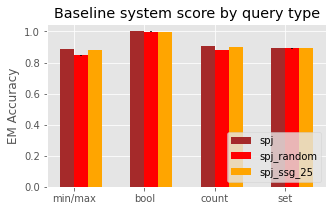

In [108]:
plt.style.use('ggplot')

labels = ['min/max','min/max_complex', 'bool', 'bool_complex', 'count', 'count_complex', 'set', 'set_complex']
labels = ['min/max', 'bool', 'count', 'set']
plt.rcParams["figure.figsize"] = (5,3)
scores = []
for system in systems:
    score = []
    for label in labels:
        score.append(all_system_type[system][label])

    scores.append(score)

x = np.arange(len(labels))  # the label locations
width = 0.2  # the width of the bars

fig, ax = plt.subplots()
ptr = -1*len(systems)*width/2+width

colors = ["brown","red","orange","yellow"]

for color, score, system in zip(colors,scores,systems):
    print(system, [np.mean(s) for s in score], [np.std(s) for s in score])
    rects1 = ax.bar(x + ptr, [np.mean(s) for s in score], width, color=color, yerr=[np.std(s) for s in score], label=system)
    ptr += width
# Add some text for labels, title and custom x-axis tick labels, etc.
ax.set_ylabel('EM Accuracy')
ax.set_title('Baseline system score by query type')
plt.xticks(x,rotation=0)
ax.set_xticklabels(labels)
ax.legend(loc='lower right')
plt.savefig("baseline_type.pdf")

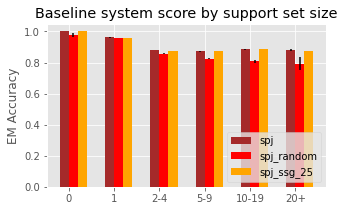

In [103]:
plt.style.use('ggplot')

ranges = [0,1,2,5,10,20]
labels = ["0","1","2-4","5-9","10-19","20+"]
s_bins = []
for idx,r in enumerate(ranges[:-1]):
    s_bins.append((ranges[idx],ranges[idx+1]))
    
s_bins.append(20)
plt.rcParams["figure.figsize"] = (5,3)
scores = []
for system in systems:
    score = []
    for sbin in s_bins:
        local = []
        score.append(all_system_bins[system][sbin])

    scores.append(score)
    

x = np.arange(len(labels))  # the label locations
width = 0.2  # the width of the bars

fig, ax = plt.subplots()
ptr = -1*len(systems)*width/2+width

colors = ["brown","red","orange","yellow"]

for color, score, system in zip(colors,scores,systems):
    rects1 = ax.bar(x + ptr, [np.mean(s) for s in score], width, color=color, yerr=[np.std(s) for s in score], label=system)
    ptr += width
# Add some text for labels, title and custom x-axis tick labels, etc.
ax.set_ylabel('EM Accuracy')
ax.set_title('Baseline system score by support set size')
plt.xticks(x,rotation=0)
ax.set_xticklabels(labels)
ax.legend(loc='lower right')
plt.savefig("baseline_size.pdf")